# PROBLEM STATEMENT AND BUSINESS CASE

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# IMPORT LIBRARIES AND DATASETS

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from plotnine import *

In [6]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd "/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/MARKETING"

/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/MARKETING


In [7]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/MARKETING/Marketing_data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
######## Explanations ###################
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

- there is only one categorical variable with cust_id. All others are numerical

In [12]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- we will have to check the missing data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3aeaa126d8>,
      dtype=object)

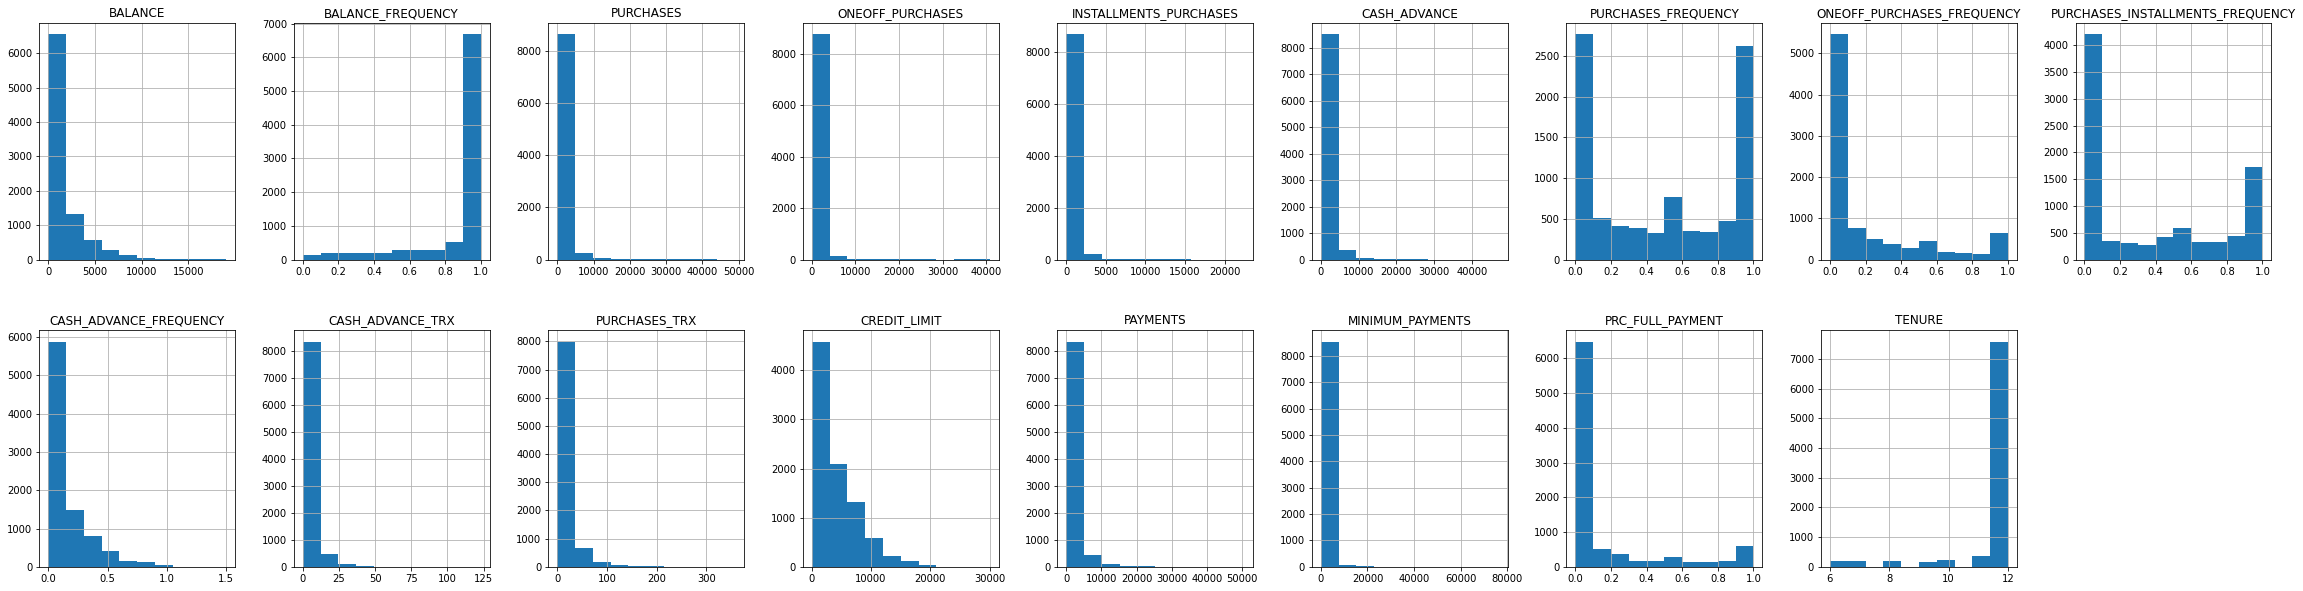

In [19]:
df.hist(layout=(2,9), figsize=(40,10))

- All variables have a range of values (no constant)
- Purchases and Payments seem quite similar. Should be checked with correlation analysis

In [20]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [22]:
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

In [24]:
# Let's see who made one off purchase of $40761!
df[df.ONEOFF_PURCHASES==df.ONEOFF_PURCHASES.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [25]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
df[df.CASH_ADVANCE==df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# VISUALIZE AND EXPLORE DATASET

In [4]:
# Let's deal with missing data!
df[df.CREDIT_LIMIT.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


- it seems a dormant customer or a customer who used the card only once with small cash advance. never made a purchase. Let's set the credit limit to the mean

In [12]:
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean(), inplace=True)

In [11]:
df[df.MINIMUM_PAYMENTS.isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


- Many seem having done No payment with Card so minimum payment could be safely set to zero for those.

In [8]:
df.loc[(df.MINIMUM_PAYMENTS.isnull()==True) & (df.PAYMENTS==0), 'MINIMUM_PAYMENTS'] = 0

In [9]:
# Fill up the remaining missing elements with mean of the 'MINIMUM_PAYMENT' 
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean(), inplace=True)

In [13]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [62]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

In [10]:
# Let's drop Customer ID since it has no meaning here 
df.drop('CUST_ID', inplace=True, axis=1)

In [14]:
len(df.columns)

17

In [64]:
features = df.columns
features

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

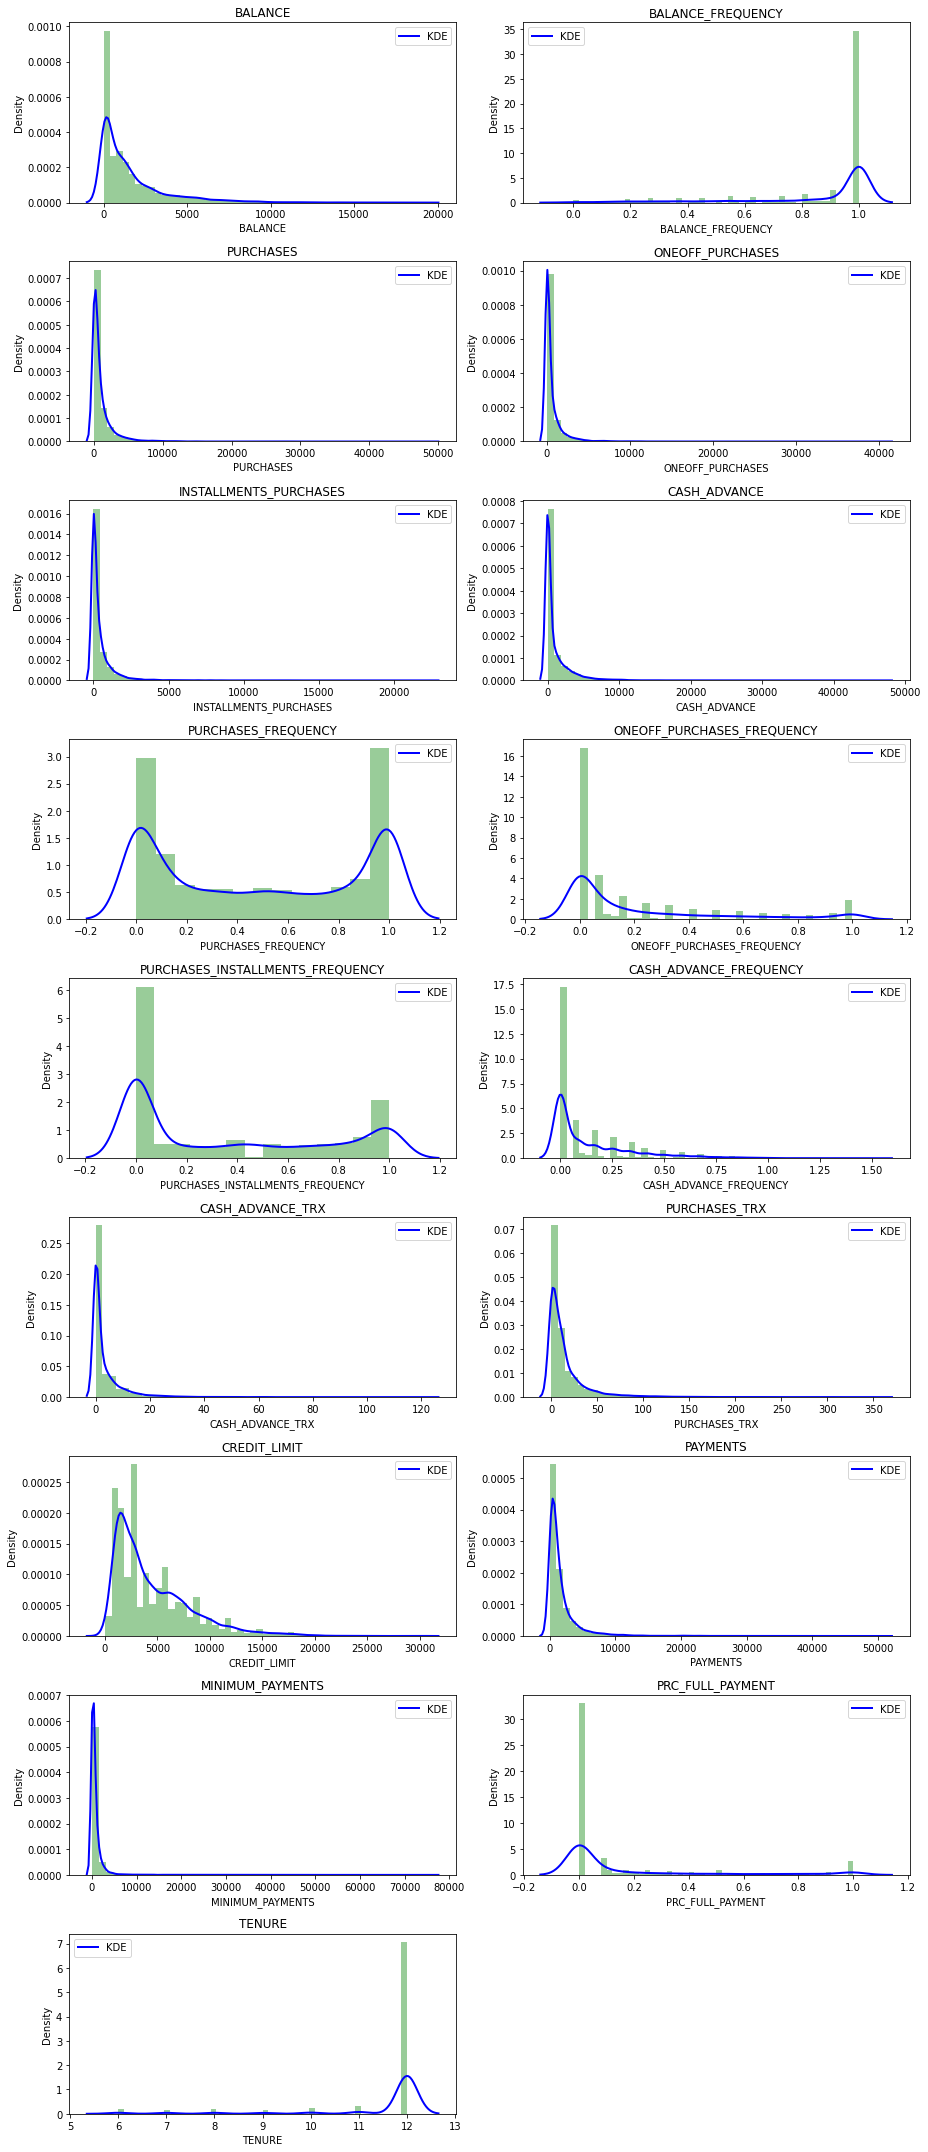

In [38]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable.

plt.figure(figsize=(13,30))
for i in range(len(df.columns)):
  plt.subplot(len(df.columns)//2+1,2,i+1)
  sns.distplot(df[df.columns[i]], hist_kws={'color':'g'}, kde_kws={'color':'b', 'lw':2, 'label':'KDE'})
  plt.title(df.columns[i])
  plt.legend()
plt.tight_layout()

In [39]:
# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

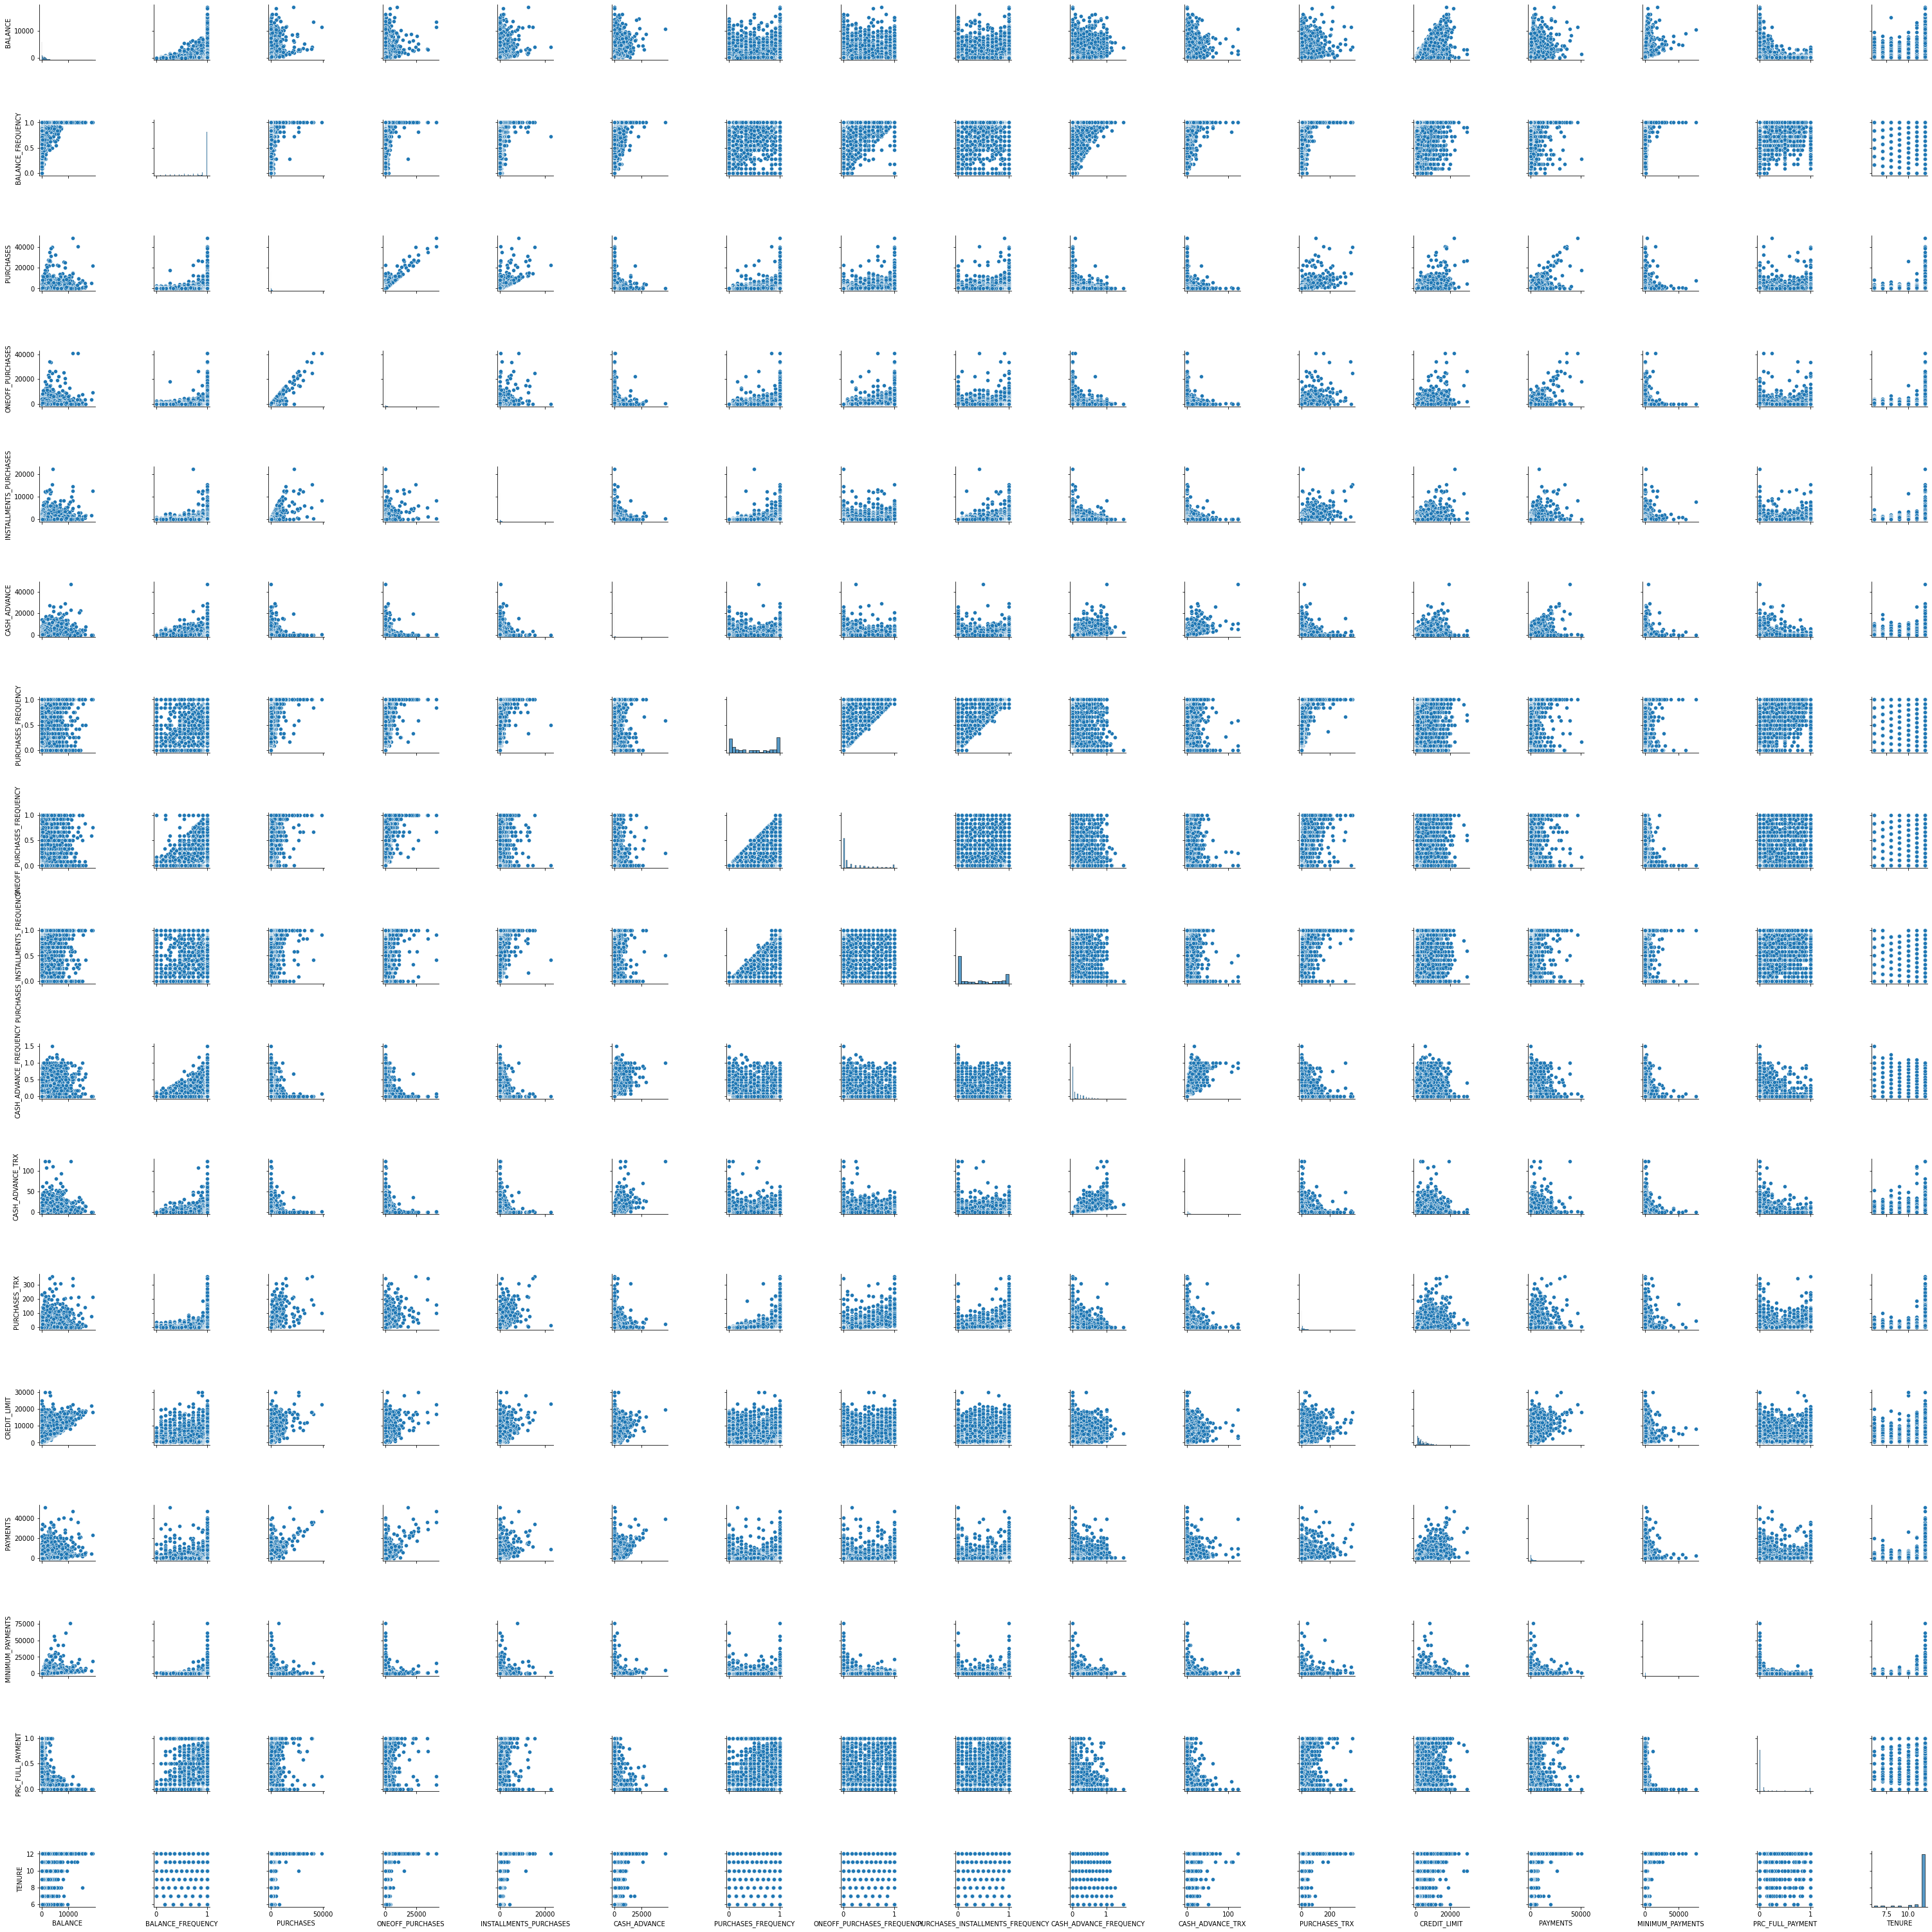

In [102]:
sns.pairplot(df)

In [ ]:
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

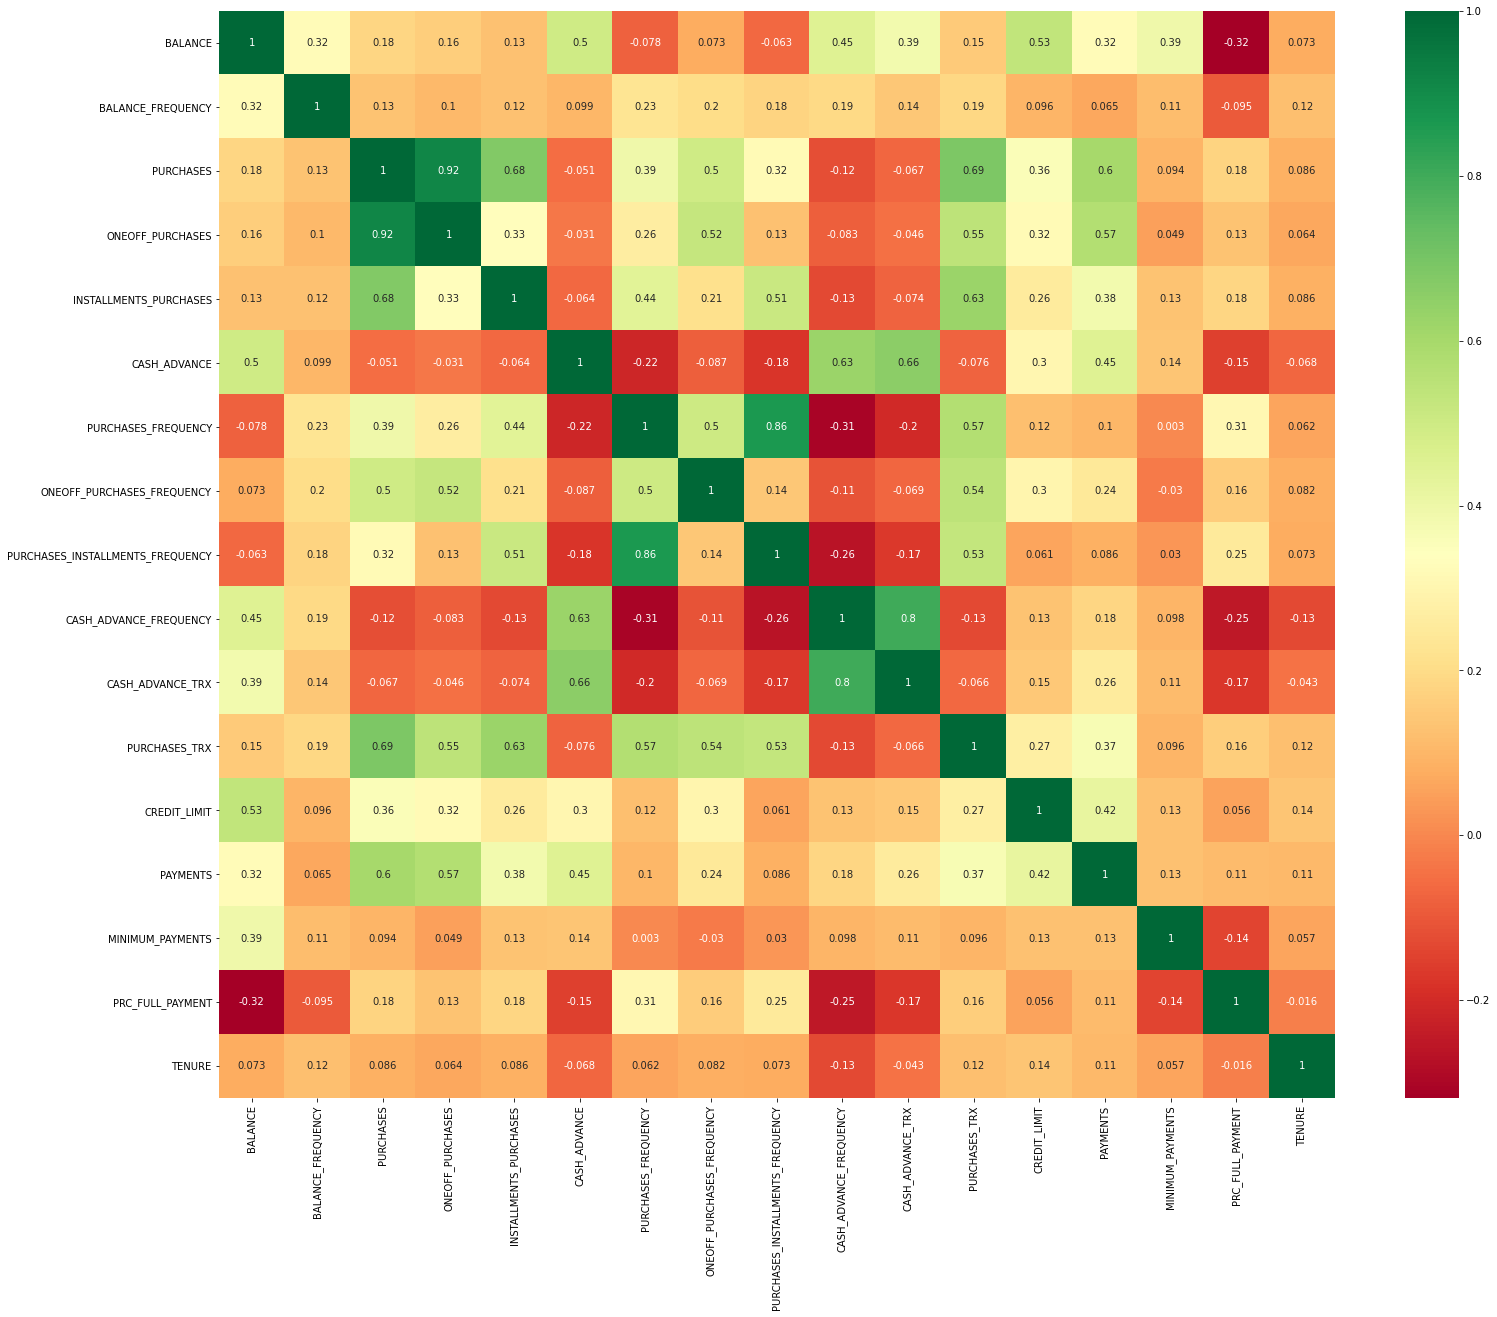

In [101]:
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'
correlations = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlations, annot=True,cmap="RdYlGn")

# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [15]:
# Let's scale the data first
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df)
normalized_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30040327,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09915834,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09147338,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32485738,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.3362779 ,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32234282,
        -0.52555097, -4.12276757]])

In [29]:
normalized_df.shape


(8950, 17)

In [80]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(normalized_df)
  wcss_values.append(kmeans.inertia_)

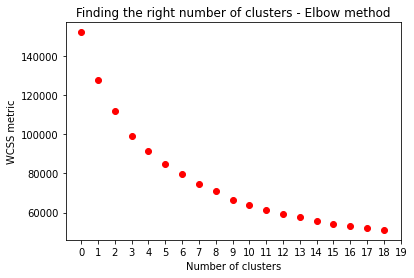

In [81]:
plt.plot(wcss_values,'ro')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 

Let's choose the number of clusters to be 7. Note that **scale starts with 0 which means we actually pick 8 clusters**

# APPLY K-MEANS METHOD

In [62]:
kmeans=KMeans(8)
kmeans.fit(normalized_df)
kmeans.cluster_centers_.shape

(8, 17)

we have 8 centroids with 17 coordinates corresponding to each features of the dataset

In [71]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df.columns])

In [66]:
labels = kmeans.labels_
labels

array([7, 0, 2, ..., 4, 4, 4], dtype=int32)

These are the cluster N° associated to each sample

In [69]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [67]:
labels.shape

(8950,)

In [68]:
# concatenate the clusters labels to our original dataframe
df_with_centroids = pd.concat([df, pd.DataFrame({'centroid':labels})], axis=1)
df_with_centroids     

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,centroid
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,840.841715,0.000000,6,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4


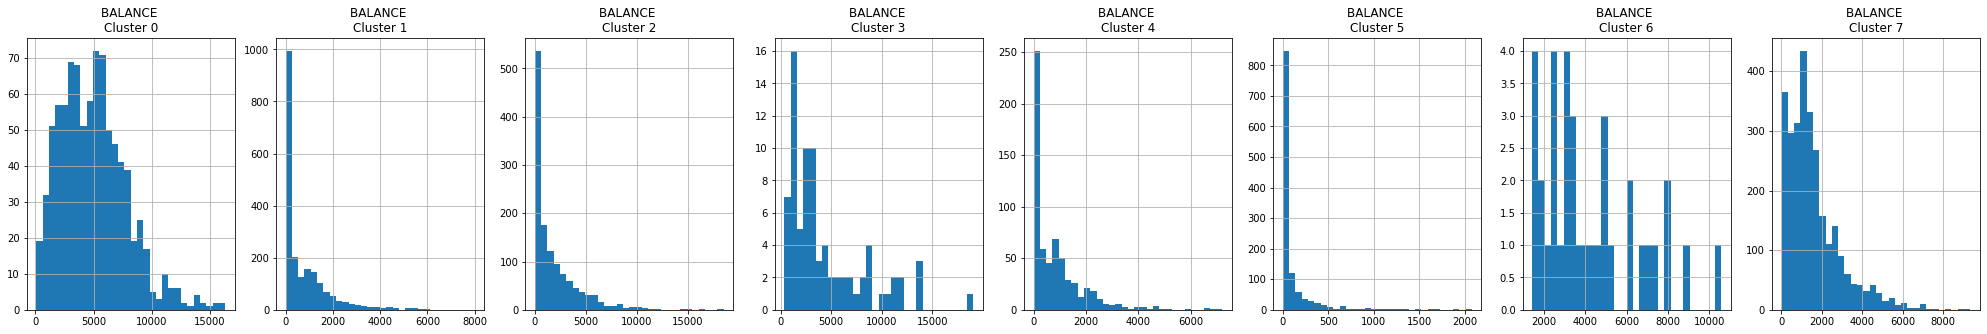

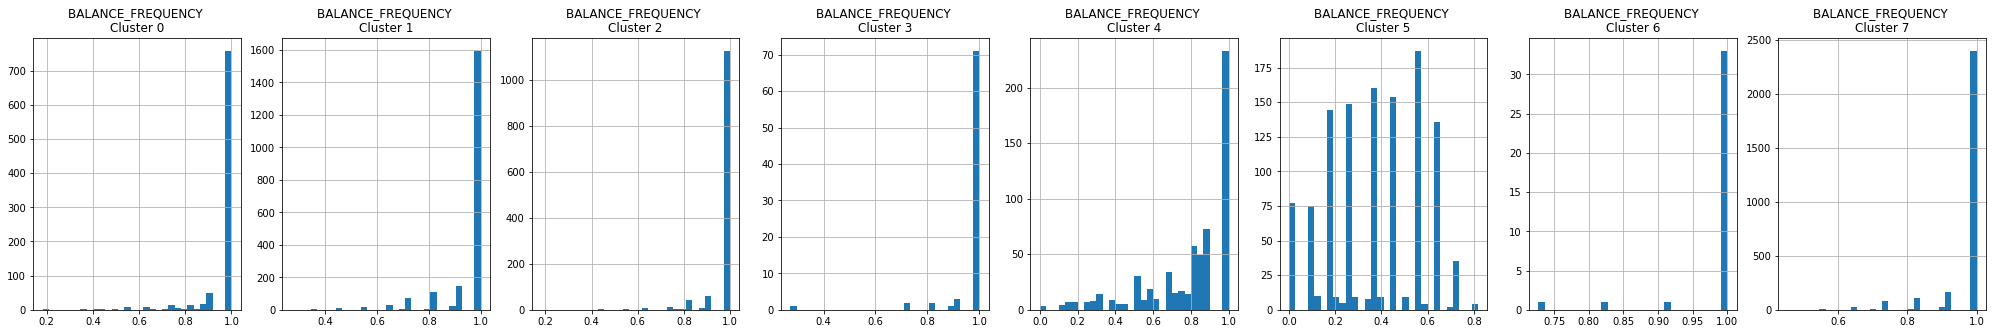

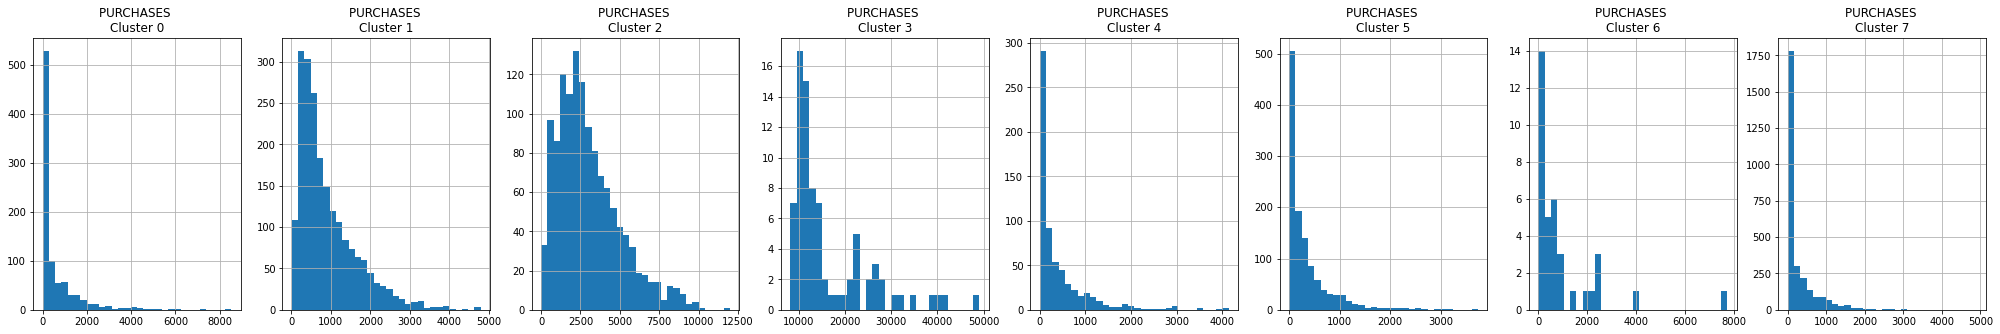

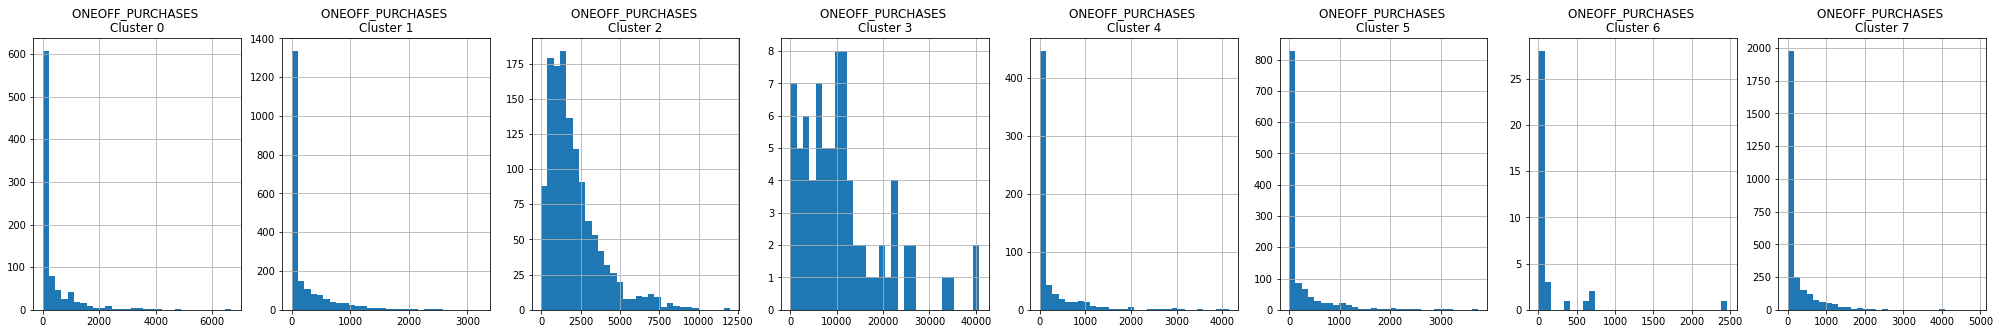

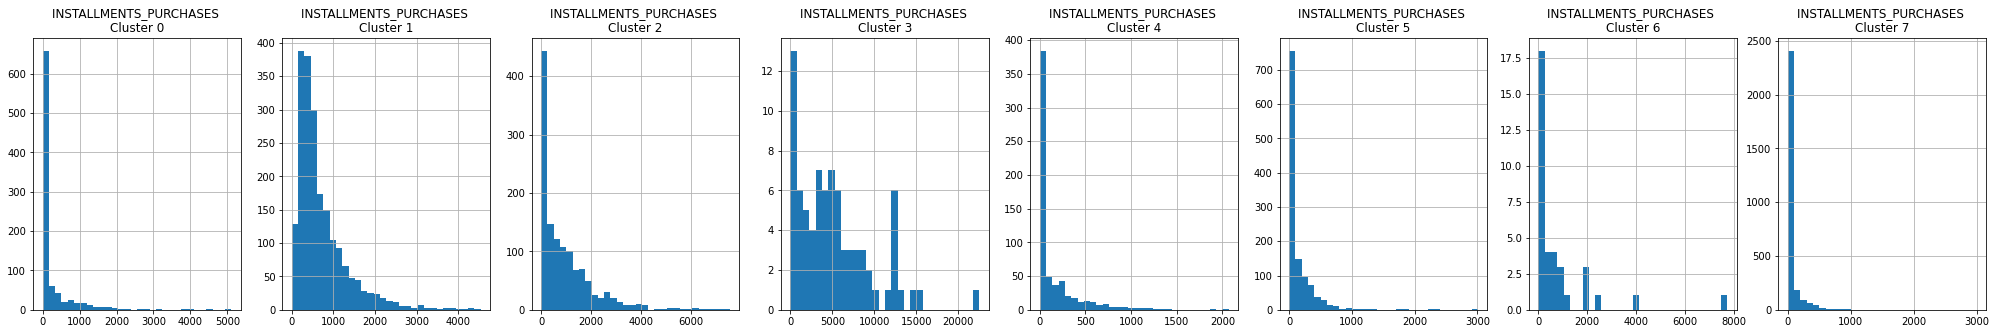

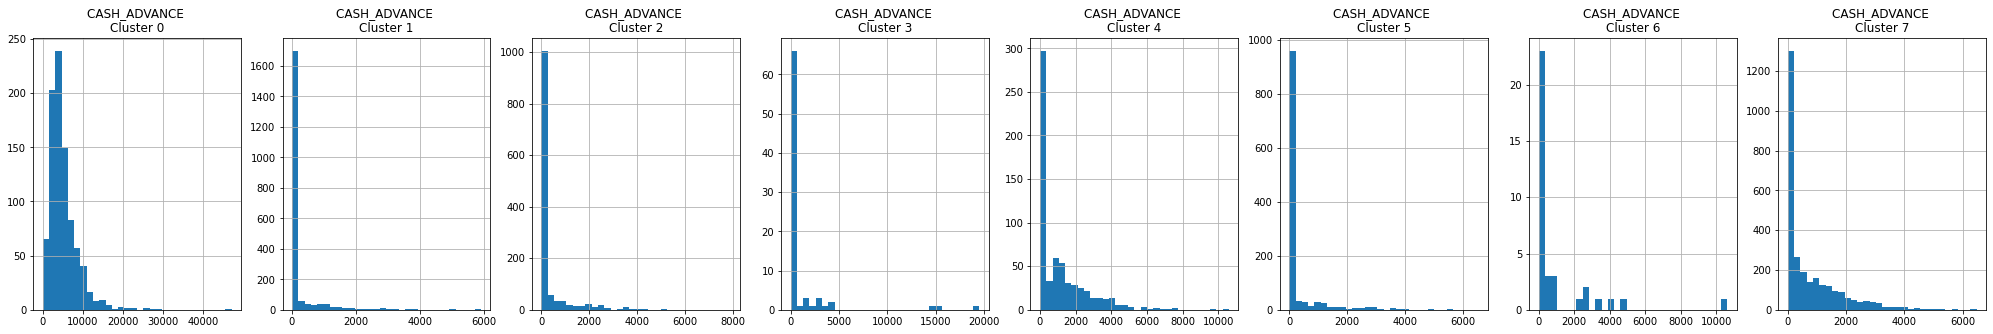

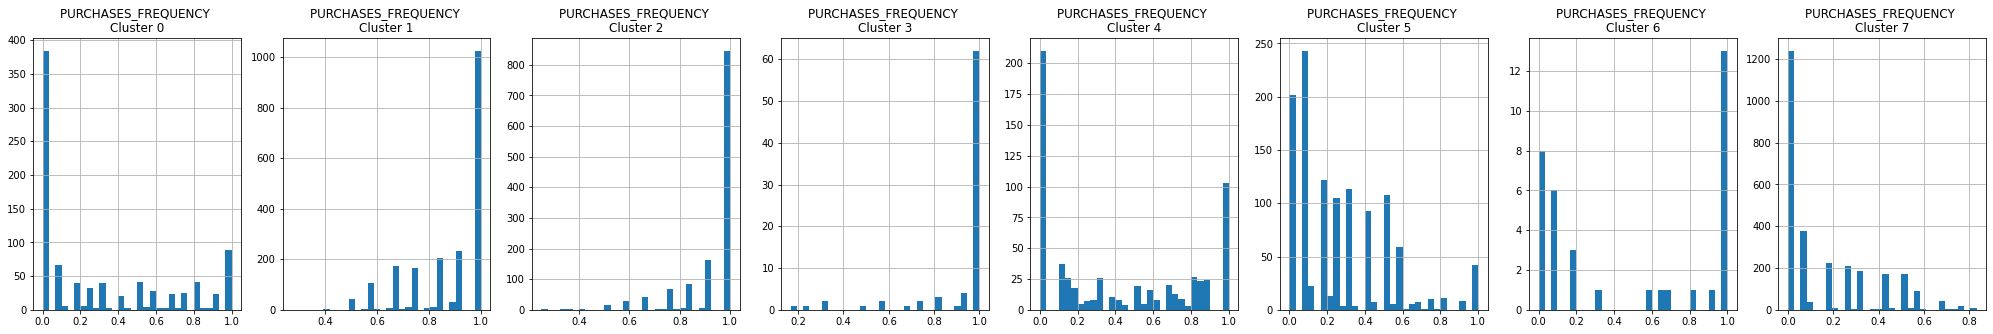

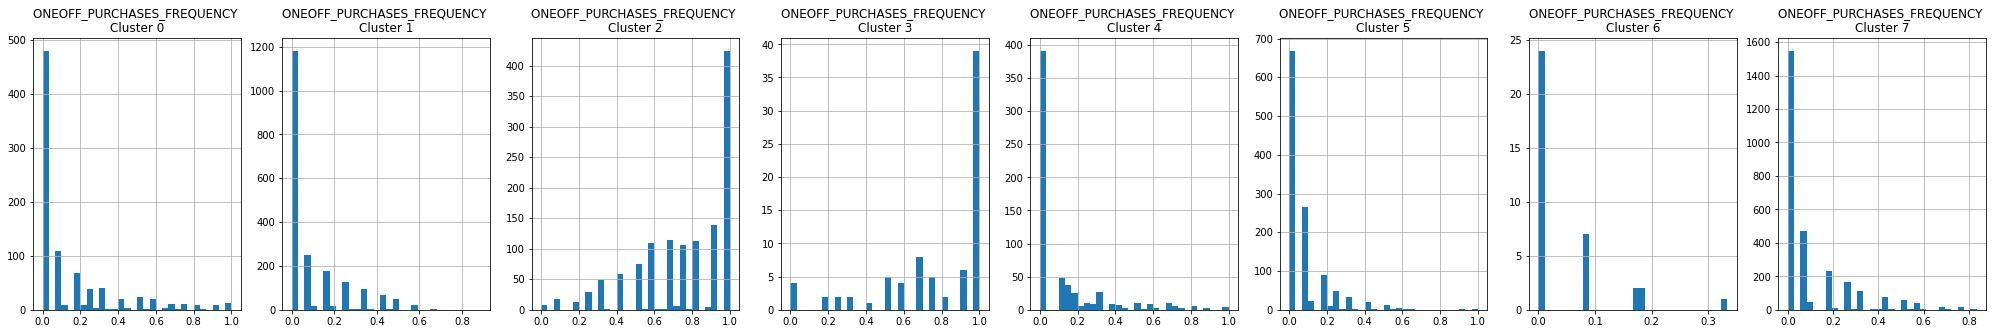

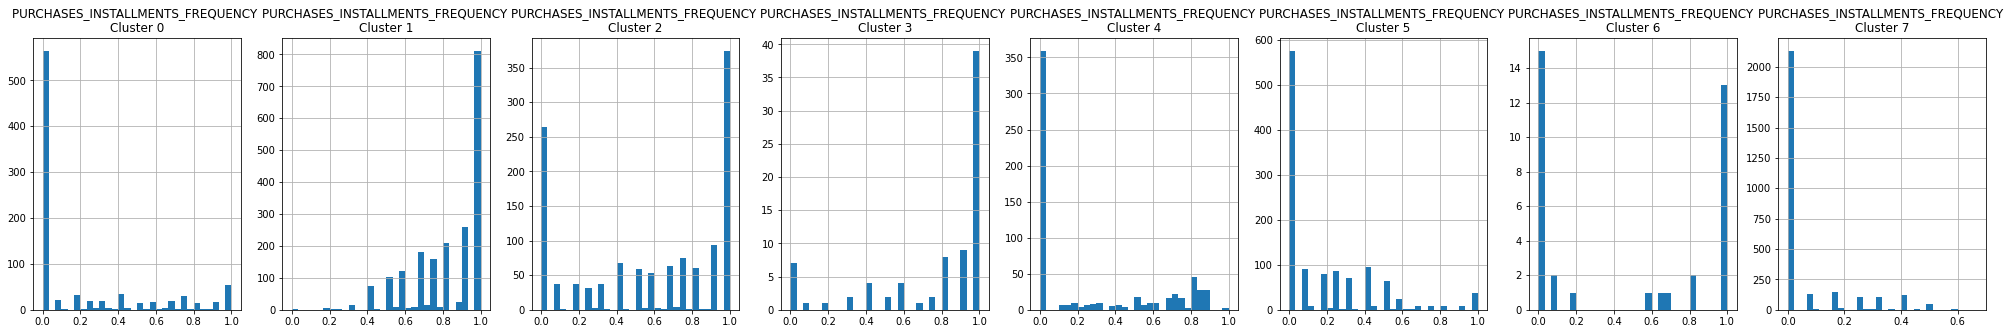

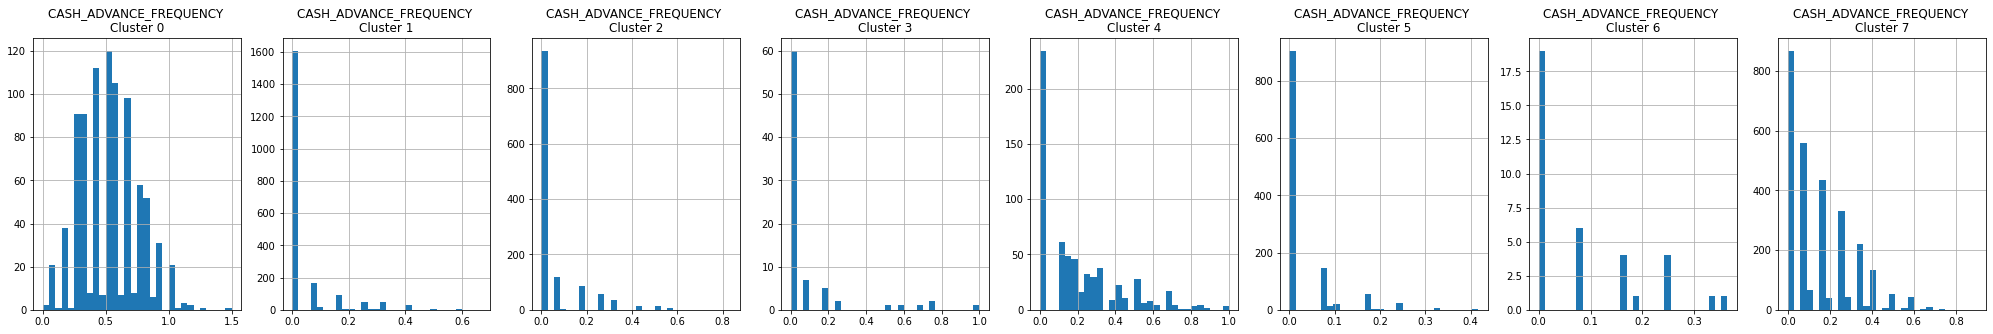

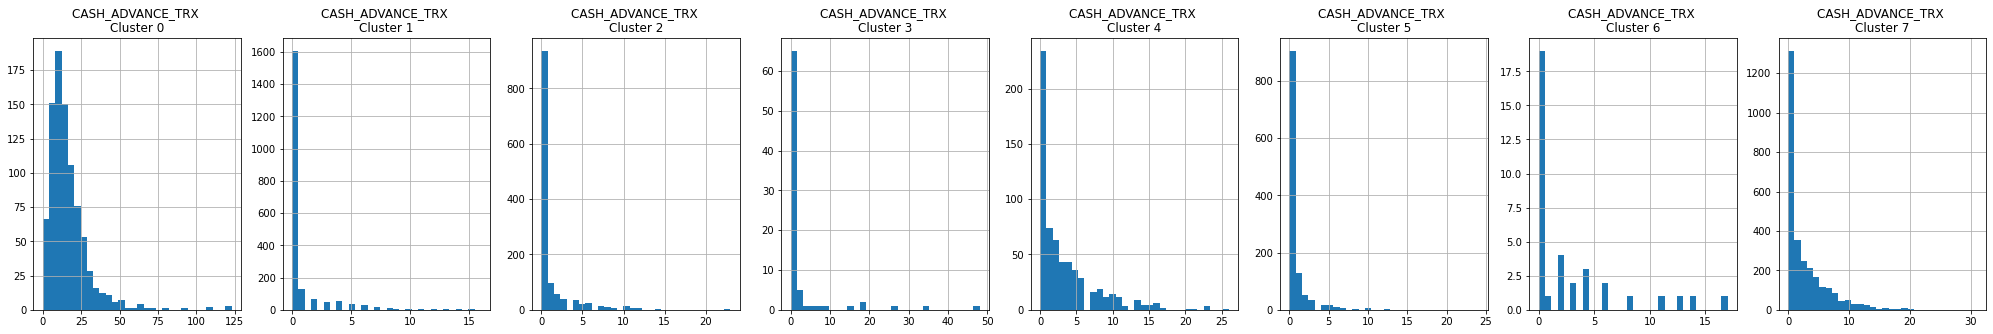

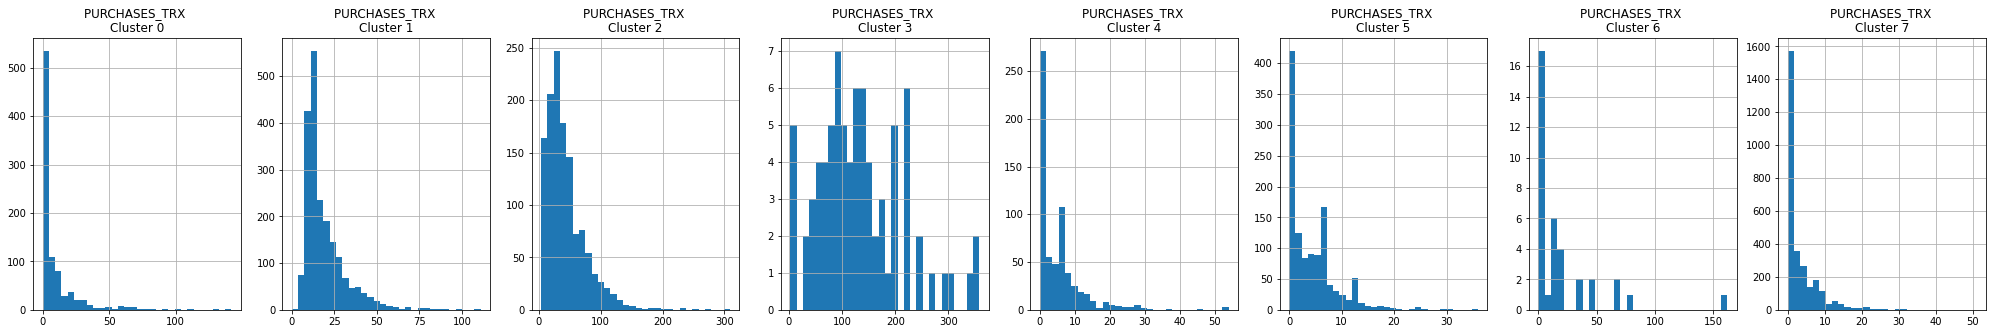

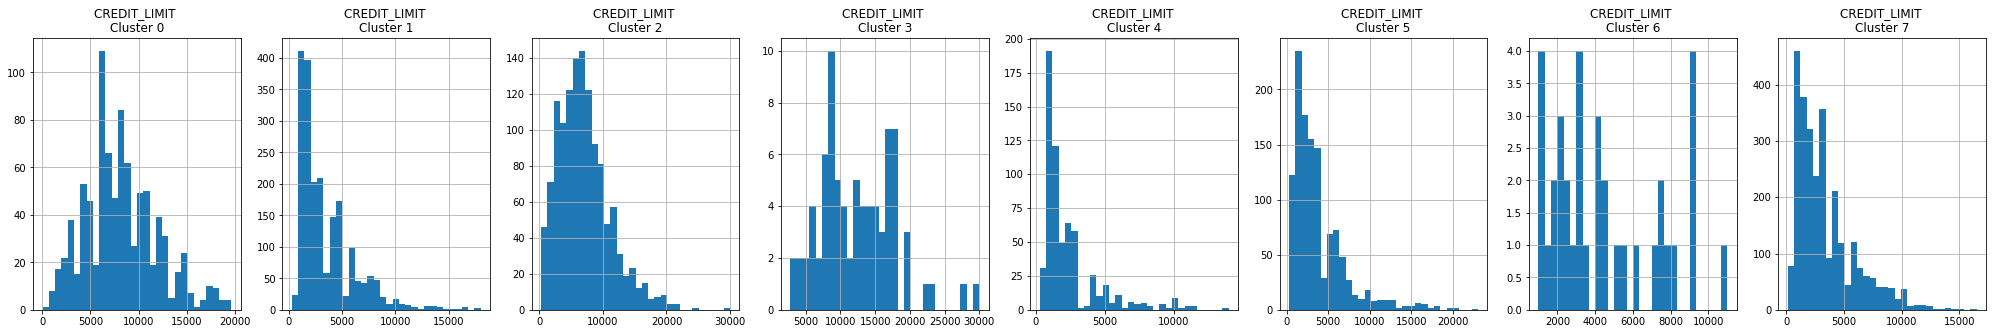

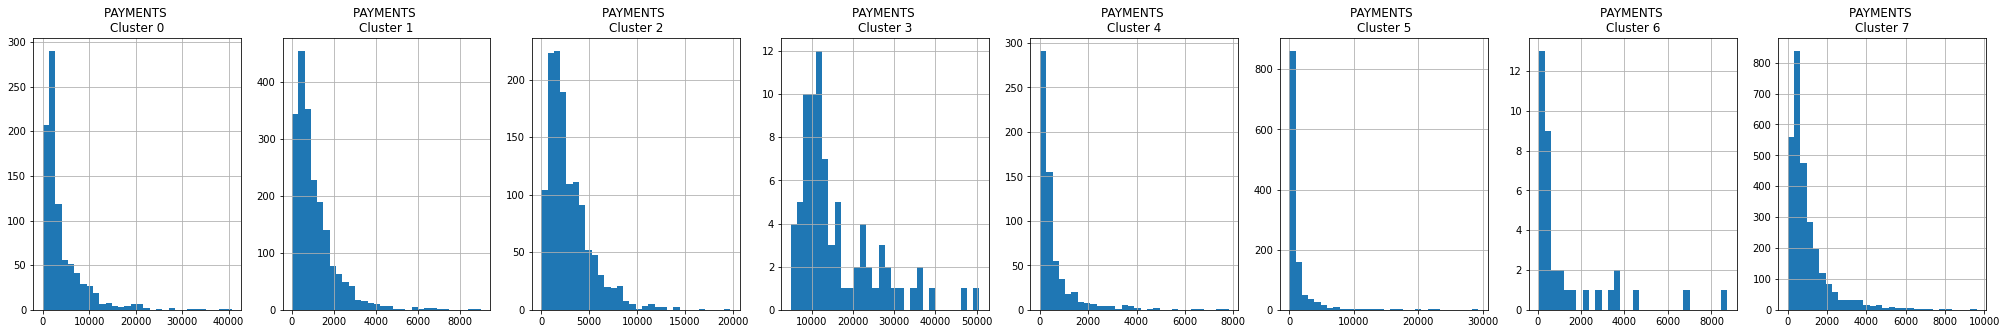

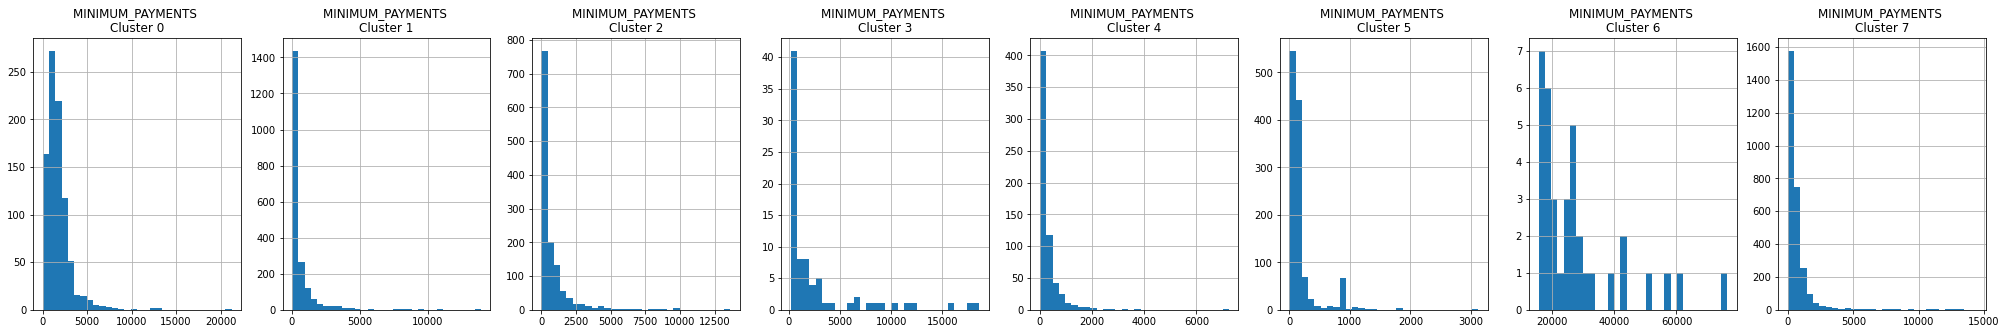

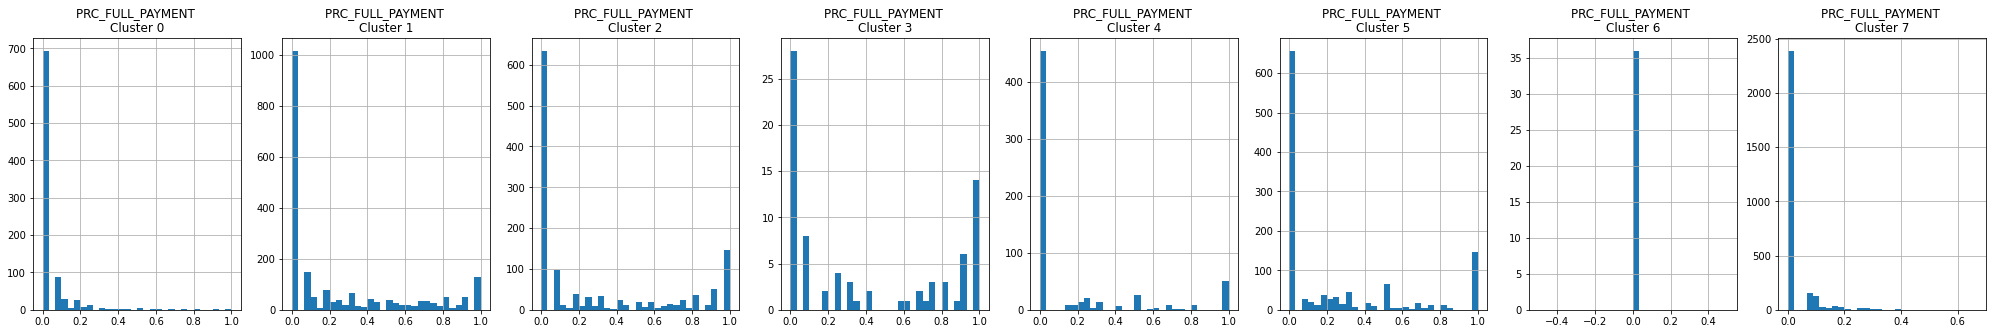

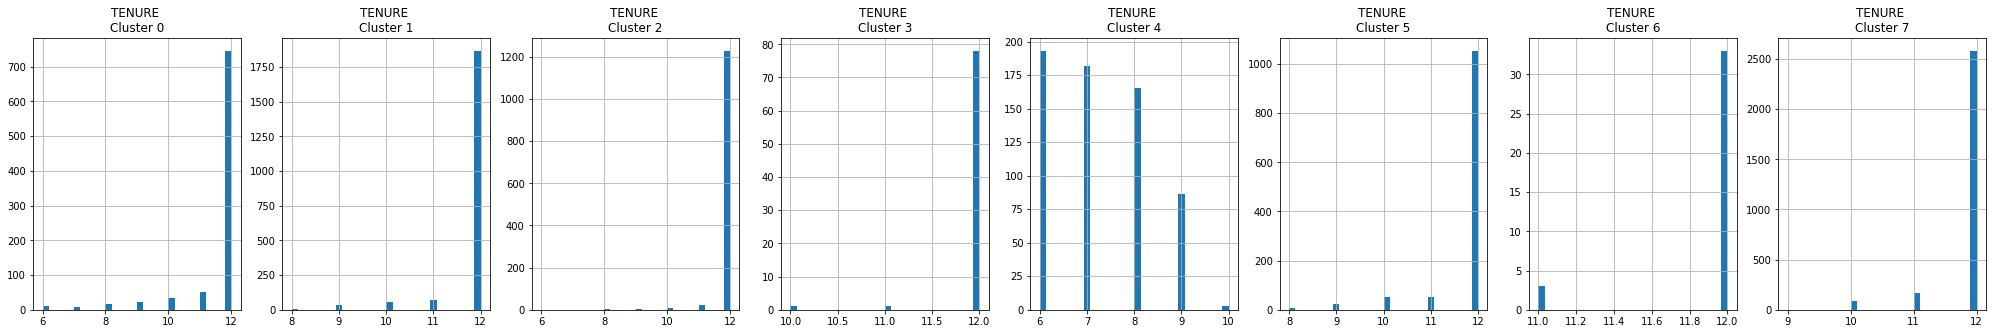

In [70]:
# Plot the histogram of various clusters (one cluster = one column with all features)
for feature in df.columns:
  plt.figure(figsize=(35,5))  
  for centroid in range(8):
    plt.subplot(1,8,centroid+1)
    cluster = df_with_centroids[df_with_centroids.centroid==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [74]:
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids.shape

(8, 17)

Plot the characteristics of the different clusters using their centroids
- This helps understading the different segments determined with Kmeans

In [75]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids = pd.DataFrame(data=cluster_centroids, columns=[df.columns])
cluster_centroids
# first customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# second customers cluster (Credit purchasers) with high purchase frequency (0.9) who use payment installment facility the most (highest installment frequency 0.83), pay in full whenever possible (second highest Percentage of full payment = 25%) and do not use costly cash advance service
# Third customers cluster (Active cash buyers): Those are active buyers paying in full. Cluster with highest purchase frequency (0.93), second highest purchase transactions and one-off purchases, highest % of payment in full (29%)
# Fourth customer cluster (VIP/Prime): high credit limit $12K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fith customer cluster (low tenure): these are customers with low tenure (7 years), low balance
# Sixth Customers cluster (Transactors): Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance ($104) and second lowest cash advance ($303), Percentage of full payment = 24%
# Seventh customer cluster (one-off): Record-high minimum payments level of nearly 28k$
# Eighth customer cluster (Low activity): these are customers using the less their card (lowest purchase frequency) and with the lowest purchase amount
# note: cluster named by order not using index starting from 0

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4993.026721,0.970229,567.300894,344.809581,222.606324,5191.548162,0.306147,0.146179,0.202884,0.522579,16.509050,8.774887,8172.007404,4171.511660,1760.866302,4.003417e-02,11.608597
1,771.687243,0.955273,913.170592,204.743907,708.867375,205.589780,0.883476,0.096624,0.829496,0.039330,0.767637,18.844105,3483.902418,1079.113435,635.128557,2.460888e-01,11.853971
2,1865.361752,0.979256,3028.943537,2083.438259,945.975867,340.935900,0.929845,0.758847,0.580547,0.054494,1.105098,44.644706,7068.727273,2891.176539,744.591926,2.858037e-01,11.929412
3,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,4.066166e-01,11.962500
4,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,326.600398,1.574873e-01,7.243243
5,103.540821,0.371392,347.092201,209.719739,137.622715,301.615215,0.270648,0.074517,0.189152,0.030663,0.677909,4.353288,3868.203579,1149.392761,177.585148,2.402024e-01,11.787521
6,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,2.833333,20.166667,4476.388889,1357.092339,27995.061876,-5.551115e-17,11.916667
7,1578.195094,0.972519,269.638952,219.741387,50.072248,756.829994,0.166055,0.102801,0.065678,0.151612,2.956936,3.165902,3399.582304,1013.679306,743.723885,2.141382e-02,11.880692


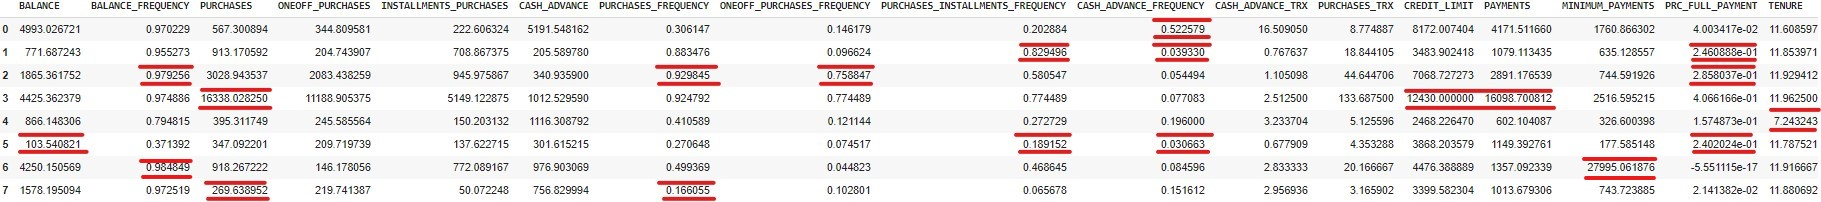

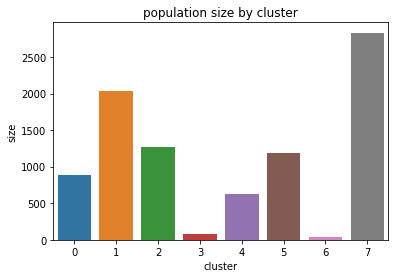

In [93]:
# Check size of each cluster - Are they all representative ?
cluster_size = []
for centroid, cluster_df in df_with_centroids.groupby("centroid"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

- Clearly the two clusters 4 and 7 (above n°3 and 6 or "VIP/Prime" and "one-off") are extremely small and primarily represent some kind of exceptions. They may not constitute potential market segments within the current population
- the largest cluster represents the customer group with a limited purchase activity and a limited use of their card to make purchases.

# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [95]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_df)
principal_components

array([[-1.68383064, -1.07152779],
       [-1.1334942 ,  2.50988768],
       [ 0.96925329, -0.38379097],
       ...,
       [-0.92933145, -1.80748235],
       [-2.33804614, -0.65280782],
       [-0.55830314, -0.40037883]])

In [101]:
# All samples projected on the two principal components
principal_components.shape

(8950, 2)

In [102]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(principal_components, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.683831,-1.071528
1,-1.133494,2.509888
2,0.969253,-0.383791
3,-0.896867,-0.017522
4,-1.600116,-0.683146


In [103]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.683831,-1.071528,7
1,-1.133494,2.509888,0
2,0.969253,-0.383791,2
3,-0.896867,-0.017522,7
4,-1.600116,-0.683146,7


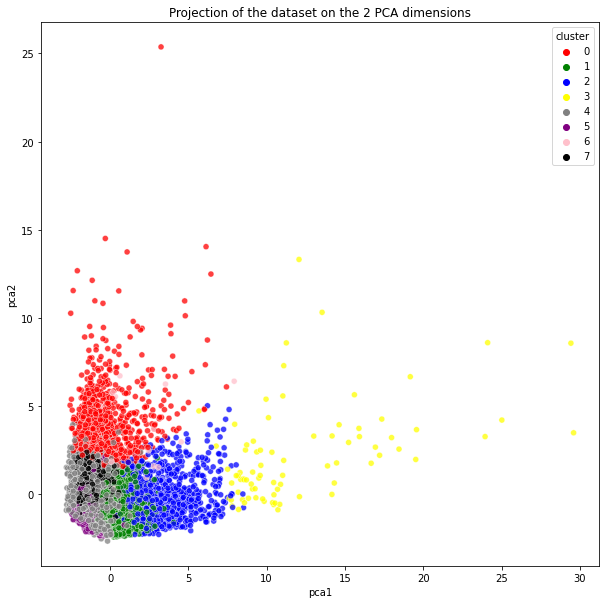

In [137]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2',hue = 'cluster', data = pca_df, palette=['red','green','blue','yellow','gray','purple','pink','black'], alpha=0.75)
plt.title('Projection of the dataset on the 2 PCA dimensions')
plt.show()

Our 2 small clusters are presented in pink and yellow. The largest, in black, is minimal in this new set of principal components.

In [140]:
# Principal axes in feature space, representing the directions of maximum variance in the data
pca.components_

array([[ 0.10182755,  0.12051556,  0.41154015,  0.34630891,  0.3367547 ,
        -0.02274294,  0.32120731,  0.29444847,  0.27448574, -0.08851096,
        -0.04806839,  0.39057924,  0.21190944,  0.26652641,  0.06395983,
         0.13178808,  0.08109728],
       [ 0.40378149,  0.13131931,  0.03988926,  0.06179975, -0.01927866,
         0.43908135, -0.19118032, -0.01867642, -0.17887034,  0.43420886,
         0.41972391, -0.02028446,  0.23795768,  0.25675467,  0.16865488,
        -0.19005732, -0.00423547]])

In [139]:
# % of the total variance explained by each principal component. Overall close to 48% explained by these two.
pca.explained_variance_ratio_

array([0.27299243, 0.20311671])

# AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [17]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform # Xavier's initialization
from keras.optimizers import SGD                         # Stochastic Gradient Descent

In [23]:
input_df = Input(shape=(17,))  # The 17 features of our dataset
# Encoder
x = Dense(units=7, activation='relu')(input_df)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=2000, activation='relu', kernel_initializer='glorot_uniform')(x)
# Bottleneck
encoded = Dense(units=10, activation='relu', kernel_initializer='glorot_uniform')(x)
# Decoder
x = Dense(units=2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
# we reconstruct the same number of features as the input
decoded = Dense(units=17, kernel_initializer='glorot_uniform')(x)   

# Autoencoder
autoencoder = Model(input_df, decoded)
# Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_13 (Dense)             (None, 2000)              2200

In [25]:
normalized_df.shape

(8950, 17)

**Train autoencoder using input = output**

In [26]:
autoencoder.fit(x= normalized_df, y= normalized_df, batch_size=128, epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 5s 56ms/step - loss: 0.7163
Epoch 2/25
70/70 [==============================] - 4s 56ms/step - loss: 0.3038
Epoch 3/25
70/70 [==============================] - 4s 54ms/step - loss: 0.2233
Epoch 4/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1796
Epoch 5/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1636
Epoch 6/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1398
Epoch 7/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1502
Epoch 8/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1459
Epoch 9/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1145
Epoch 10/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1049
Epoch 11/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1039
Epoch 12/25
70/70 [==============================] - 4s 55ms/step - loss: 0.1078
Epoch 13/25
70/70 [==================

In [27]:
# Use Autoencoder to reduce the number of features / dimensions
pred = encoder.predict(normalized_df)
pred.shape

(8950, 10)

The dataset is reduced from 17 features (or dimensions) to 10 using trained autoencoder which should retain as much information as possible in the process

## Apply KMEANS to encoded dataset

In [82]:
wcss_values_autoencoder = []
for i in range(1,20):
  kmeans= KMeans(n_clusters= i)
  kmeans.fit(pred)
  wcss_values_autoencoder.append(kmeans.inertia_)

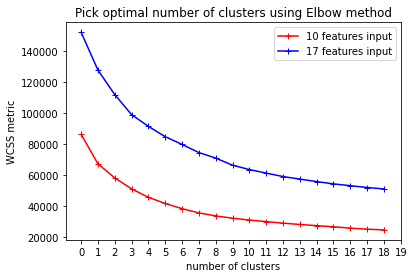

In [83]:
plt.plot(wcss_values_autoencoder, 'r+-', label='10 features input')
plt.plot(wcss_values, 'b+-', label='17 features input')
plt.xlabel('number of clusters')
plt.ylabel('WCSS metric')
plt.title('Pick optimal number of clusters using Elbow method')
plt.xticks(ticks=range(0,20))
plt.legend()
plt.show()

Let's use 5 clusters

In [86]:
kmeans= KMeans(5)
kmeans.fit(pred)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

In [87]:
centroids.shape

(5, 10)

In [88]:
clusters.shape

(8950,)

In [89]:
set(clusters)

{0, 1, 2, 3, 4}

In [90]:
df_with_labels = pd.concat([df, pd.DataFrame({'cluster':clusters})], axis=1 )
df_with_labels.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [102]:
print('Number of samples in:')
for cluster, df_cluster in df_with_labels.groupby('cluster'):
  print('cluster', cluster, '->',len(df_cluster))

Number of samples in:
cluster 0 -> 4850
cluster 1 -> 908
cluster 2 -> 1091
cluster 3 -> 89
cluster 4 -> 2012


## Apply PCA to encoded dataset

In [92]:
pca = PCA(2)
principal_components = pca.fit_transform(pred)
pca_df = pd.DataFrame(principal_components,columns=['pca_1', 'pca_2'])
pca_df.head()

,pca_1,pca_2
0,-1.434305,-0.241702
1,2.048108,-1.493694
2,-1.996573,0.463548
3,0.204798,-0.291178
4,-1.914839,-0.263709


In [93]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':clusters})], axis=1)
pca_df.head()

,pca_1,pca_2,cluster
0,-1.434305,-0.241702,0
1,2.048108,-1.493694,1
2,-1.996573,0.463548,0
3,0.204798,-0.291178,0
4,-1.914839,-0.263709,0


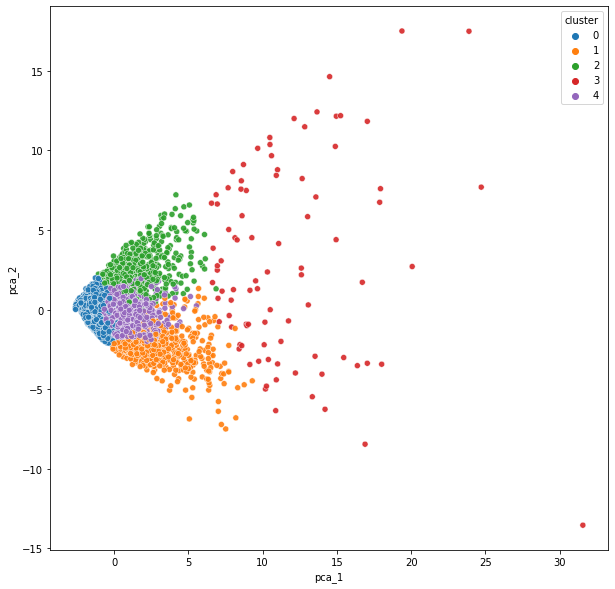

In [96]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca_1', y='pca_2', data=pca_df, hue='cluster', palette='tab10', alpha=0.9)  # or 'Spectral' color palette
plt.show()

In [97]:
pca.explained_variance_ratio_

array([0.4080244 , 0.22300082], dtype=float32)

In [99]:
print(f'PCA still explains {round(pca.explained_variance_ratio_.sum()*100,0)}% of the total variance from the encoder output')

PCA still explains 63.0% of the total variance from the encoder output
